# **Modelo de Clasificación  K-Vecinos y Regresión logística**

Actualmente, se tiene clasificado la calidad de las bananas en dos grupos. Si la utilización de los datos relacionados a distintas caracteristicas de la banana puede servirnos para predecir a que grupo al cual pertenecen, el hecho de predecir la calidad de una banana ayudaria con la reducción del desperdicio de alimentos, ya que no solo permitiria optimizar el inventario, si no tambien el consumo, asegurando que las bananas se vendan y se consuman en su punto óptimo de madurez, lo que reduce significativamente el desperdicio de alimentos., esta tarea por lo tanto sería un problema de clasificación. Es decir, dado el conjunto de datos, se necesita construir un modelo para predecir la calidad de una nueva banana.

Para este caso, se usarán caracteristicas de la banana, las cuales son: Tamaño (Size), Peso (Weight), Dulzura (Sweetness), Suavidad (Softness), Tiempo de cosecha (HarvestTime), Madurez (Ripeness), Acidez (Acidity).

El campo de destino, llamado `Quality`, tiene dos valores posibles que corresponden a los dos estados en los que puede estar la banana, de la siguiente manera:

0. Bad
1. Good


Como se menciono anteriormente, se trabajará un conjunto de datos relacionado con la calidad de las bananas. Luego, se dividirán los datos en conjuntos de entrenamiento y prueba, se creará un modelo usando el conjunto de entrenamiento, se evaluará su modelo usando el conjunto de prueba y finalmente se usará el modelo para predecir el valor desconocido.

## Tabla de Contenidos

1.  [Importar y Preparar los Datos de Análisis](#2)
2.  [Modelo de Regresión Simple](#4)
3.  [Modelos de Regresión No Lineales](#6)
4.  [Ejemplo de una Regresión No Lineal](#8)

# 1. Importar y Preparar los Datos de Análisis <a id="2"></a>

## Carga y Preparación de Datos

Instalar e importar Bibliotecas:

In [70]:
# Instalar bibliotecas específicas para trabajar 
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install scikit-learn
!pip3 install seaborn


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importar los paquetes de procesamiento y visualización de datos **pandas**, **numpy**, **matplotlib**, **sklearn** y **scipy**. No olvidar de poner `% matplotlib inline` para que las gráficas puedan aparecer en *Jupyter Notebook*.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy import stats
%matplotlib inline

## Leer el Conjunto de Datos

Cargar los datos y guardarlos en el dataframe `df`:

In [72]:
# ruta de datos y leer los datos para guardarlos en df

path='datos/banana_quality.csv'
df = pd.read_csv(path)

In [73]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [74]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


Inicialmente el DataFrame contiene una columna llamada **Quality**, la cuál contiene dos valores tipo object, Good y Bad, que fueron cambiados a 1 y 0 respectivamente, para poder estudiar la correlación entre las variables 

In [75]:
df['Quality'] = df['Quality'].replace({'Good': 1, 'Bad': 0})

C:\Users\mparr\AppData\Local\Temp\ipykernel_22032\842005656.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Quality'] = df['Quality'].replace({'Good': 1, 'Bad': 0})


In [76]:
# mostrar los 5 primeros registros de conjunto de datos

df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


## Pre-procesamiento de los Datos


Antes de iniciar con la configuración del modelo, se realizará un preprocesamiento de los datos. Este incluirá un análisis de correlación para seleccionar las características más relevantes que contribuirán al desempeño del modelo. En particular, se evaluará la correlación de Pearson para identificar las variables que tienen una relación significativa con la variable objetivo. Las características que demuestren una correlación alta se conservarán, optimizando así el conjunto de datos para el entrenamiento del modelo.

Primero se va a realizar un rápido análisis y visualización de los Datos. Se utilizara el metodo `df.value_counts()`, para observar cuantas bananas hay en cada clase en el conjunto de datos.

In [77]:
df['Quality'].value_counts()

Quality
1    4006
0    3994
Name: count, dtype: int64

Como se puede observar, hay 4006 Bananas de calidad Buena (Good) y 3994 Bananas de calidad Mala (Bad)

In [78]:
df.corr(numeric_only=True)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673,0.352983
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879,0.388789
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059,0.377220
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014,-0.001637
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903,0.376600
Ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531,0.350503
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000,-0.000860
Quality,0.352983,0.388789,0.377220,-0.001637,0.376600,0.350503,-0.000860,1.000000


In [79]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object

## Correlación
Aqui podemos ver las correlaciones que existen entre las variables del dataset. Se entiende por correlación como la que indicará la **fuerza** y **dirección** de una relación lineal y proporcionalidad entre dos variables estadísticas

In [80]:
df.corr(numeric_only=True)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673,0.352983
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879,0.388789
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059,0.377220
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014,-0.001637
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903,0.376600
Ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531,0.350503
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000,-0.000860
Quality,0.352983,0.388789,0.377220,-0.001637,0.376600,0.350503,-0.000860,1.000000


In [81]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Weight'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.3887889014342623  con un valor de P = 5.513984954425239e-287


In [82]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Size'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.35298288717138604  con un valor de P = 1.960547470665041e-233


In [83]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Sweetness'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.37721998620869324  con un valor de P = 6.195977428804751e-269


In [84]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Softness'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es -0.0016374770035392045  con un valor de P = 0.8835759406046256


In [85]:
coeficiente_pearson, valor_p = stats.pearsonr(df['HarvestTime'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.3766002028322521  con un valor de P = 5.477675102993626e-268


In [86]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Ripeness'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.350503385265196  con un valor de P = 5.656660876896538e-230


In [87]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Acidity'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es -0.0008596341117588012  con un valor de P = 0.9387221807334138


Como **valor P** entre la suavidad y acidez con la calidad, es mayor a 0,1, esto nos indica que no existe una significancia estadistica entre estas dos variables con respecto a la calidad, por lo tanto eliminaremos estas dos variables, para poder alimentar al modelo con variables que si son significativas para nuestra variable objetivo 

In [88]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

En base a los datos recopilados de correlación y de los respectivos valores de P, las dos características que se descartaran con el objetivo simplificar el modelo sin perder información relevante sobre la calidad de las bananas, son:

- Softness: Tiene un coeficiente de correlación casi nulo (-0.0016) y un valor p muy alto (0.88), indicando que no hay una relación significativa con la calidad de la banana.

- Acidity: De una manera similar, tiene un coeficiente de correlación casi nulo (-0.00089) y un valor p muy alto (0.93), indicando que no hay una relación significativa con la calidad de la banana.


In [89]:
X = df[['Size', 'Weight', 'Sweetness', 'HarvestTime', 'Ripeness']].values  #.astype(float)
X[0:5]


array([[-1.92,  0.47,  3.08,  0.29,  2.44],
       [-2.41,  0.49,  0.35, -0.89,  2.07],
       [-0.36,  1.48,  1.57, -0.65,  3.09],
       [-0.87,  1.57,  1.89, -1.01,  1.87],
       [ 0.65,  1.32, -0.02, -1.43,  1.08]])

In [90]:
y = df['Quality'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [91]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-0.55,  0.61,  1.98,  0.52,  0.78],
       [-0.78,  0.62,  0.57, -0.07,  0.61],
       [ 0.18,  1.11,  1.2 ,  0.05,  1.09],
       [-0.06,  1.15,  1.37, -0.13,  0.52],
       [ 0.66,  1.03,  0.38, -0.34,  0.14]])

## Configuración modelo

In [92]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Conjunto de Entrenamiento set:', X_entrena.shape,  y_entrena.shape)
print ('Conjunto de Prueba:', X_prueba.shape,  y_prueba.shape)

Conjunto de Entrenamiento set: (6400, 5) (6400,)
Conjunto de Prueba: (1600, 5) (1600,)


In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
k = 9

# Crear y entrenar el modelo y pronosticar  
vecino = KNeighborsClassifier(n_neighbors = k)
vecino.fit(X_entrena,y_entrena)
vecino

KNeighborsClassifier(n_neighbors=9)

In [95]:
y_hat = vecino.predict(X_prueba)
y_hat[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [96]:
print("Precisión del conjunto de entrenamiento: ", metrics.accuracy_score(y_entrena, vecino.predict(X_entrena)))
print("Precisión del conjunto de prueba: ", metrics.accuracy_score(y_prueba, y_hat))

Precisión del conjunto de entrenamiento:  0.9328125
Precisión del conjunto de prueba:  0.9325


In [97]:
Ks = 20
prec_promedio = np.zeros((Ks-1))
prec_estandar = np.zeros((Ks-1))
matriz_confusion = [];
for n in range(1,Ks):
    # Entrena el modelo y pronostica  
    vecino_n = KNeighborsClassifier(n_neighbors = n).fit(X_entrena,y_entrena)
    y_hat=vecino_n.predict(X_prueba)
    prec_promedio[n-1] = metrics.accuracy_score(y_prueba, y_hat)
    prec_estandar[n-1] = np.std(y_hat==y_prueba)/np.sqrt(y_hat.shape[0])

print('Precisión promedio: ',prec_promedio)
print('Precisión desviación estándar: ',prec_estandar)

Precisión promedio:  [0.9  0.9  0.93 0.92 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93 0.93
 0.93 0.93 0.93 0.93 0.93]
Precisión desviación estándar:  [0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01]


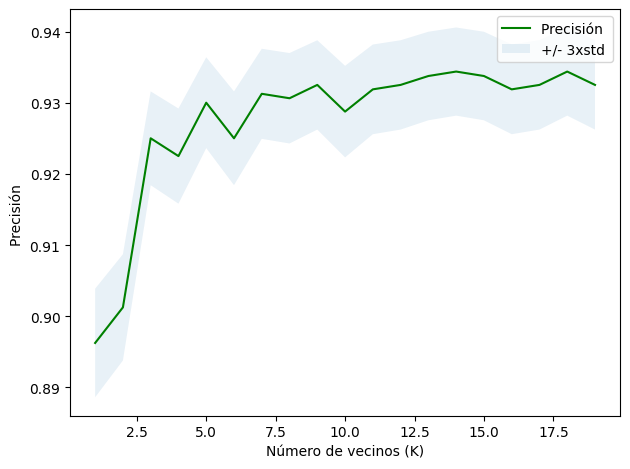

In [98]:
plt.plot(range(1,Ks),prec_promedio,'g')
plt.fill_between(range(1,Ks),prec_promedio - 1 * prec_estandar,prec_promedio + 1 * prec_estandar, alpha=0.10)
plt.legend(('Precisión ', '+/- 3xstd'))
plt.ylabel('Precisión ')
plt.xlabel('Número de vecinos (K)')
plt.tight_layout()
plt.show()

In [99]:
print( "La mejor precisión se obtuvo con", prec_promedio.max(), "con k=", prec_promedio.argmax()+1) 

La mejor precisión se obtuvo con 0.934375 con k= 14


arbol de decision

In [100]:
path3='datos/banana_quality.csv'
df3 = pd.read_csv(path3)
df3.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [101]:
print('Tamaño: ', df3.size)
print('Forma: ', df3.shape)

Tamaño:  64000
Forma:  (8000, 8)


In [102]:
X3 = df3[['Size', 'Weight', 'Sweetness', 'HarvestTime', 'Ripeness']].values
X3[0:5]

array([[-1.92,  0.47,  3.08,  0.29,  2.44],
       [-2.41,  0.49,  0.35, -0.89,  2.07],
       [-0.36,  1.48,  1.57, -0.65,  3.09],
       [-0.87,  1.57,  1.89, -1.01,  1.87],
       [ 0.65,  1.32, -0.02, -1.43,  1.08]])

In [103]:
y3 = df3["Quality"]
y3[0:5]

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Quality, dtype: object

In [104]:
X3_entrena, X3_prueba, y3_entrena, y3_prueba = train_test_split(X3, y3, test_size=0.3, random_state=3)
print ('Conjunto de Entrenamiento set:', X3_entrena.shape,  y3_entrena.shape)
print ('Conjunto de Prueba:', X3_prueba.shape,  y3_prueba.shape)

Conjunto de Entrenamiento set: (5600, 5) (5600,)
Conjunto de Prueba: (2400, 5) (2400,)


In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
arbol_modelo = DecisionTreeClassifier(criterion="log_loss", max_depth = 6)
arbol_modelo

DecisionTreeClassifier(criterion='log_loss', max_depth=6)

In [107]:
arbol_modelo.fit(X3_entrena,y3_entrena)

DecisionTreeClassifier(criterion='log_loss', max_depth=6)

In [108]:
arbol_pronostico = arbol_modelo.predict(X3_prueba)

In [109]:
print (arbol_pronostico [0:5])
print (y3_prueba [0:5])

['Good' 'Good' 'Good' 'Bad' 'Good']
5396    Good
4205    Good
3459     Bad
2195     Bad
515     Good
Name: Quality, dtype: object


In [110]:
print("Precición del modelo basado en árbol de decisiones: ", metrics.accuracy_score(y3_prueba, arbol_pronostico))

Precición del modelo basado en árbol de decisiones:  0.875


In [111]:
precision_alternativo = np.sum(np.equal(y3_prueba, arbol_pronostico)) / len(y3_prueba)
precision_alternativo

0.875

Maquina de vectores de soporte

In [112]:
path5='datos/banana_quality.csv'
df5 = pd.read_csv(path5)
df5.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [113]:
df5['Quality'] = df5['Quality'].replace({'Good': 1, 'Bad': 0})

C:\Users\mparr\AppData\Local\Temp\ipykernel_22032\950100234.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df5['Quality'] = df5['Quality'].replace({'Good': 1, 'Bad': 0})


In [114]:
print('Tamaño: ', df5.size)
print('Forma: ', df5.shape)

Tamaño:  64000
Forma:  (8000, 8)


In [115]:
X5 = np.asarray(df5[['Size', 'Weight', 'Sweetness', 'HarvestTime', 'Ripeness']])
X5[0:5]

array([[-1.92,  0.47,  3.08,  0.29,  2.44],
       [-2.41,  0.49,  0.35, -0.89,  2.07],
       [-0.36,  1.48,  1.57, -0.65,  3.09],
       [-0.87,  1.57,  1.89, -1.01,  1.87],
       [ 0.65,  1.32, -0.02, -1.43,  1.08]])

In [116]:
y5 = np.asarray(df5['Quality'])
y5 [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [117]:
X5_entrena, X5_prueba, y5_entrena, y5_prueba = train_test_split(X5, y5, test_size=0.2, random_state=4)
print ('Conjunto de Entrenamiento set:', X5_entrena.shape,  y5_entrena.shape)
print ('Conjunto de Prueba:', X5_prueba.shape,  y5_prueba.shape)

Conjunto de Entrenamiento set: (6400, 5) (6400,)
Conjunto de Prueba: (1600, 5) (1600,)


In [118]:
from sklearn import svm

modelo_svm = svm.SVC(kernel='rbf')
modelo_svm.fit(X5_entrena, y5_entrena) 

SVC()

In [119]:
y5_hat = modelo_svm.predict(X5_prueba)
y5_hat

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [120]:
# Esta función imprime y grafica una matriz de confusión.
# Se puede aplicar una normalización configurando el parámetro `normalize=True`.

import itertools

def grafica_matriz_confusion(matr_conf, clases,
                          normalizar=False,
                          titulo='Matriz de Confusión',
                          cmap=plt.cm.Blues):

    if normalizar:
        matr_conf = matr_conf.astype('float') / matr_conf.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada.")
    else:
        print('Matriz de Confusión matrix sin normalización')

    print(matr_conf)

    plt.imshow(matr_conf, interpolation='nearest', cmap=cmap)
    plt.title(titulo)
    plt.colorbar()
    tick_marks = np.arange(len(clases))
    plt.xticks(tick_marks, clases, rotation=45)
    plt.yticks(tick_marks, clases)

    formato = '.2f' if normalizar else 'd'
    umbral = matr_conf.max() / 2.
    for i, j in itertools.product(range(matr_conf.shape[0]), range(matr_conf.shape[1])):
        plt.text(j, i, format(matr_conf[i, j], formato),
                 horizontalalignment="center",
                 color="white" if matr_conf[i, j] > umbral else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta valores Verdaderos')
    plt.xlabel('Etiqueta valores Pronosticados')

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       823
           1       0.93      0.94      0.93       777

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600

Matriz de Confusión matrix sin normalización
[[768  55]
 [ 50 727]]


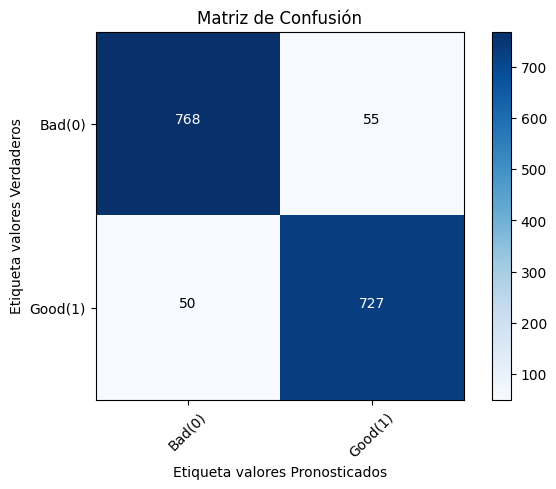

In [121]:
# Calcular matriz de confusión
matriz_confusion = metrics.confusion_matrix(y5_prueba, y5_hat, labels=[0,1])
np.set_printoptions(precision=2)

print (metrics.classification_report(y5_prueba, y5_hat))

# Grafica matriz de confusión no normalizada
plt.figure()
grafica_matriz_confusion(matriz_confusion, clases=['Bad(0)','Good(1)'],normalizar= False,  titulo='Matriz de Confusión')



In [122]:
metrics.f1_score(y5_prueba, y5_hat, average='weighted') 

0.9343802585799503

In [123]:
jaccard_score_0 = metrics.jaccard_score(y5_prueba, y5_hat, pos_label=0)
jaccard_score_1 = metrics.jaccard_score(y5_prueba, y5_hat, pos_label=1)

print("Jaccard score for label 0:", jaccard_score_0)
print("Jaccard score for label 1:", jaccard_score_1)

Jaccard score for label 0: 0.8797250859106529
Jaccard score for label 1: 0.8737980769230769


In [124]:
modelo_svm_2 = svm.SVC(kernel='poly')
modelo_svm_2.fit(X5_entrena, y5_entrena)
y5_hat_2 = modelo_svm_2.predict(X5_prueba)

# Ajustar pos_label a 1 para el cálculo del índice de Jaccard
jaccard_index = metrics.jaccard_score(y5_prueba, y5_hat_2, pos_label=1)
print("Índice de Jaccard 1: %.4f" % jaccard_index)
# Ajustar pos_label a 0 para el cálculo del índice de Jaccard
jaccard_index = metrics.jaccard_score(y5_prueba, y5_hat_2, pos_label=0)
print("Índice de Jaccard 0: %.4f" % jaccard_index)

# Calcular el valor de F1 promedio ponderado
f1_score = metrics.f1_score(y5_prueba, y5_hat_2, average='weighted')
print("Valor de F1 promedio: %.4f" % f1_score)

Índice de Jaccard 1: 0.8091
Índice de Jaccard 0: 0.8005
Valor de F1 promedio: 0.8917


REGRESION LOGISTICA


In [125]:
path4='datos/banana_quality.csv'
df4 = pd.read_csv(path4)
df4.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [126]:
print('Tamaño: ', df4.size)
print('Forma: ', df4.shape)

Tamaño:  64000
Forma:  (8000, 8)


In [127]:
df4['Quality'] = df4['Quality'].replace({'Good': 1, 'Bad': 0})

C:\Users\mparr\AppData\Local\Temp\ipykernel_22032\2125369980.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4['Quality'] = df4['Quality'].replace({'Good': 1, 'Bad': 0})


In [128]:
print('Tamaño: ', df4.size)
print('Forma: ', df4.shape)


Tamaño:  64000
Forma:  (8000, 8)


In [129]:
X4 = np.asarray(df4[['Size', 'Weight', 'Sweetness', 'HarvestTime', 'Ripeness']])
X4[0:5]

array([[-1.92,  0.47,  3.08,  0.29,  2.44],
       [-2.41,  0.49,  0.35, -0.89,  2.07],
       [-0.36,  1.48,  1.57, -0.65,  3.09],
       [-0.87,  1.57,  1.89, -1.01,  1.87],
       [ 0.65,  1.32, -0.02, -1.43,  1.08]])

In [130]:
y4 = np.asarray(df4['Quality'])
y4 [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [131]:
X4 = preprocessing.StandardScaler().fit_transform(X4)
X4[0:5]

array([[-0.55,  0.61,  1.98,  0.52,  0.78],
       [-0.78,  0.62,  0.57, -0.07,  0.61],
       [ 0.18,  1.11,  1.2 ,  0.05,  1.09],
       [-0.06,  1.15,  1.37, -0.13,  0.52],
       [ 0.66,  1.03,  0.38, -0.34,  0.14]])

In [132]:
X4_entrena, X4_prueba, y4_entrena, y4_prueba = train_test_split(X4, y4, test_size=0.2, random_state=4)
print ('Conjunto de Entrenamiento set:', X4_entrena.shape,  y4_entrena.shape)
print ('Conjunto de Prueba:', X4_prueba.shape,  y4_prueba.shape)

Conjunto de Entrenamiento set: (6400, 5) (6400,)
Conjunto de Prueba: (1600, 5) (1600,)


In [133]:
from sklearn.linear_model import LogisticRegression

regr_logi = LogisticRegression(C=0.01, solver='liblinear').fit(X4_entrena,y4_entrena)
regr_logi

LogisticRegression(C=0.01, solver='liblinear')

In [134]:
y4_hat = regr_logi.predict(X4_prueba)
y4_hat

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [135]:
y4_hat_prob = regr_logi.predict_proba(X4_prueba)
y4_hat_prob

array([[0.91, 0.09],
       [0.92, 0.08],
       [0.96, 0.04],
       ...,
       [0.88, 0.12],
       [0.07, 0.93],
       [0.1 , 0.9 ]])

In [136]:
metrics.jaccard_score(y4_prueba, y4_hat)

0.7861271676300579

In [137]:
# Esta función imprime y grafica una matriz de confusión.
# Se puede aplicar una normalización configurando el parámetro `normalize=True`.

import itertools

def grafica_matriz_confusion(matr_conf, clases,
                          normalizar=False,
                          titulo='Matriz de Confusión',
                          cmap=plt.cm.Blues):

    if normalizar:
        matr_conf = matr_conf.astype('float') / matr_conf.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusión Normalizada.")
    else:
        print('Matriz de Confusión matrix sin normalización')

    print(matr_conf)

    plt.imshow(matr_conf, interpolation='nearest', cmap=cmap)
    plt.title(titulo)
    plt.colorbar()
    tick_marks = np.arange(len(clases))
    plt.xticks(tick_marks, clases, rotation=45)
    plt.yticks(tick_marks, clases)

    formato = '.2f' if normalizar else 'd'
    umbral = matr_conf.max() / 2.
    for i, j in itertools.product(range(matr_conf.shape[0]), range(matr_conf.shape[1])):
        plt.text(j, i, format(matr_conf[i, j], formato),
                 horizontalalignment="center",
                 color="white" if matr_conf[i, j] > umbral else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta valores Verdaderos')
    plt.xlabel('Etiqueta valores Pronosticados')

Matriz de Confusión matrix sin normalización
[[680  97]
 [ 88 735]]


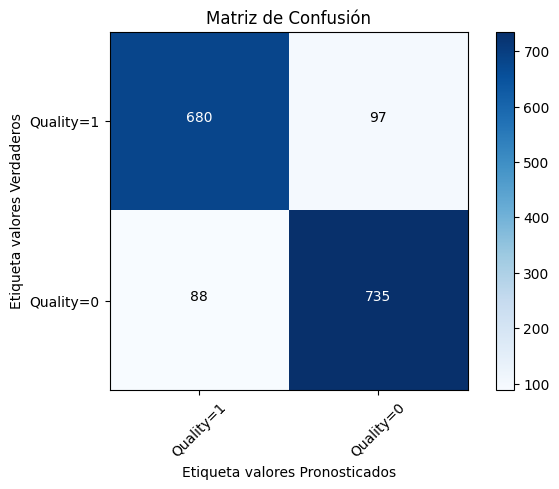

In [138]:
# Calcular matriz de confusión

matriz_confusion = metrics.confusion_matrix(y4_prueba, y4_hat, labels=[1,0])
np.set_printoptions(precision=2)

# Grafica matriz de confusión no normalizada
plt.figure()
grafica_matriz_confusion(matriz_confusion, clases=['Quality=1','Quality=0'],normalizar= False,  titulo='Matriz de Confusión')

In [139]:
print (metrics.classification_report(y4_prueba, y4_hat))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       823
           1       0.89      0.88      0.88       777

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



In [140]:
print ("Pérdila logística: %.4f" % metrics.log_loss(y4_prueba, y4_hat_prob))

Pérdila logística: 0.3027


In [141]:
regr_logi_2 = LogisticRegression(C=0.00001, solver='sag').fit(X4_entrena,y4_entrena)
y4_hat_prob_2 = regr_logi_2.predict_proba(X4_prueba)
print ("Pérdila logística: %.4f" % metrics.log_loss(y4_prueba, y4_hat_prob_2))

Pérdila logística: 0.6827
